# Difusividad Espectral

## Bibliotecas

In [27]:
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np

## Opciones de graficación
Estética de las gráficas

In [28]:
sns.set_context("paper", font_scale = 1.6)
plt.style.use(["science", "grid"])

## Funciones

In [29]:
def dmas(a, b, freq, norma):
    arcotan = np.arctan(-2 * b * freq / (a ** 2))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (dd + a)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

In [30]:
def imas(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = - (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = b + (2 * a * b * (dd - a)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [31]:
def dmenos(a, b, freq, norma):
    arcotan = np.arctan((-2 * b * freq / (a ** 2)) + np.pi)
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd - a) ** 2 + cc ** 2)
    ima = - b + (2 * a * b * (a - dd)) / ((dd - a) ** 2 + cc ** 2)
    
    return reg, ima

In [32]:
def imenos(a, b, freq, norma):
    arcotan = np.arctan((2 * b * freq / (a ** 2)))
    
    cc = norma * np.cos(arcotan)
    dd = norma * np.sin(arcotan)
    
    reg = (2 * a * b * cc) / ((dd + a) ** 2 + cc ** 2)
    ima = b - (2 * a * b * (a + dd)) / ((dd + a) ** 2 + cc ** 2)
    
    return reg, ima

## Archivos

In [33]:
frecuencias = np.loadtxt("datos/frecuencias_heatmap.csv")
nf = frecuencias.size

In [34]:
exponentes = np.loadtxt("datos/exponente_heatmap.csv").astype(int)
nexp = exponentes.size

## Listas de $A$ y $B$

In [35]:
lista_a = np.array([-0.480, -0.480, -0.481, -0.482, -0.480, -0.459, -0.452, -0.468, -0.464, -0.485])
lista_b = np.array([0.113, 0.242, 0.362, 0.455, 0.48, 0.527, 0.582, 0.626, 0.661, 0.691, 0.716])

In [36]:
regamadmas = np.empty((nexp, nf))
imgamadmas = np.empty((nexp, nf))

regamaimas = np.empty((nexp, nf))
imgamaimas = np.empty((nexp, nf))

regamadmenos = np.empty((nexp, nf))
imgamadmenos = np.empty((nexp, nf))

regamaimenos = np.empty((nexp, nf))
imgamaimenos = np.empty((nexp, nf))

for e in range(nexp):
    a = lista_a[e]
    b = lista_b[e]
    
    norma = ((a ** 4) + (16 * (b ** 2) * (frecuencias ** 2))) ** 0.25
    
    regamadmas[e], imgamadmas[e] = dmas(a, b, frecuencias, norma)
    regamaimas[e], imgamaimas[e] = imas(a, b, frecuencias, norma)
    regamadmenos[e], imgamaimenos[e] = dmenos(a, b, frecuencias, norma)
    regamaimenos[e], imgamaimenos[e] = imenos(a, b, frecuencias, norma)

In [37]:
datos = np.abs(np.abs(imgamadmas) + np.abs(imgamadmenos) - np.abs(imgamaimas) - np.abs(imgamaimenos))

In [38]:
df = pd.DataFrame(data = datos, index = np.round(exponentes, 5), columns = np.round(frecuencias, 5))
df

,0.0010,0.0015,0.0020,0.0025,0.0030,0.0035,0.0040,0.0045,0.0050,0.0055,...,55.0000,60.0000,65.0000,70.0000,75.0000,80.0000,85.0000,90.0000,95.0000,100.0000
1,5.588642e-08,1.259832e-07,0.017561,0.017563,0.017566,0.017568,0.017571,0.017573,0.017575,0.017578,...,0.136544,0.135487,0.134557,0.133730,0.132989,0.132320,0.131712,0.131157,0.130648,0.130178
2,3.760980e-02,3.762110e-02,0.037632,0.037643,0.037653,0.037664,0.037673,0.037683,0.037692,0.037701,...,0.275755,0.274249,0.272925,0.271748,0.270694,0.269743,0.268879,0.268090,0.267366,0.266697
3,5.627585e-02,5.630027e-02,0.056324,0.056346,0.056368,0.056388,0.056408,0.056427,0.056444,0.056461,...,0.402987,0.401169,0.399569,0.398148,0.396875,0.395726,0.394682,0.393728,0.392852,0.392043
4,7.074905e-02,7.078656e-02,0.070822,0.070856,0.070888,0.070918,0.070945,0.070971,0.070995,0.071016,...,0.500830,0.498804,0.497021,0.495437,0.494017,0.492735,0.491571,0.490506,0.489529,0.488627
5,7.464151e-02,7.468327e-02,0.074723,0.074760,0.074795,0.074827,0.074858,0.074885,0.074910,0.074933,...,0.526820,0.524751,0.522931,0.521314,0.519865,0.518557,0.517368,0.516281,0.515283,0.514362
6,8.196885e-02,8.202243e-02,0.082072,0.082119,0.082161,0.082200,0.082235,0.082265,0.082292,0.082314,...,0.573750,0.571690,0.569877,0.568266,0.566822,0.565518,0.564333,0.563250,0.562255,0.561337
7,9.054030e-02,9.060613e-02,0.090667,0.090722,0.090772,0.090816,0.090854,0.090887,0.090913,0.090933,...,0.630268,0.628145,0.626276,0.624615,0.623127,0.621782,0.620560,0.619443,0.618417,0.617471
8,9.738576e-02,9.745676e-02,0.097522,0.097582,0.097635,0.097683,0.097724,0.097759,0.097787,0.097809,...,0.677828,0.675549,0.673542,0.671759,0.670160,0.668717,0.667405,0.666206,0.665104,0.664087
9,1.028421e-01,1.029215e-01,0.102994,0.103059,0.103117,0.103168,0.103211,0.103245,0.103272,0.103290,...,0.713738,0.711420,0.709381,0.707568,0.705942,0.704474,0.703140,0.701921,0.700801,0.699767
10,1.075022e-01,1.075823e-01,0.107656,0.107723,0.107782,0.107835,0.107880,0.107918,0.107948,0.107970,...,0.747404,0.744924,0.742741,0.740801,0.739062,0.737491,0.736064,0.734759,0.733561,0.732455


## Gráfica

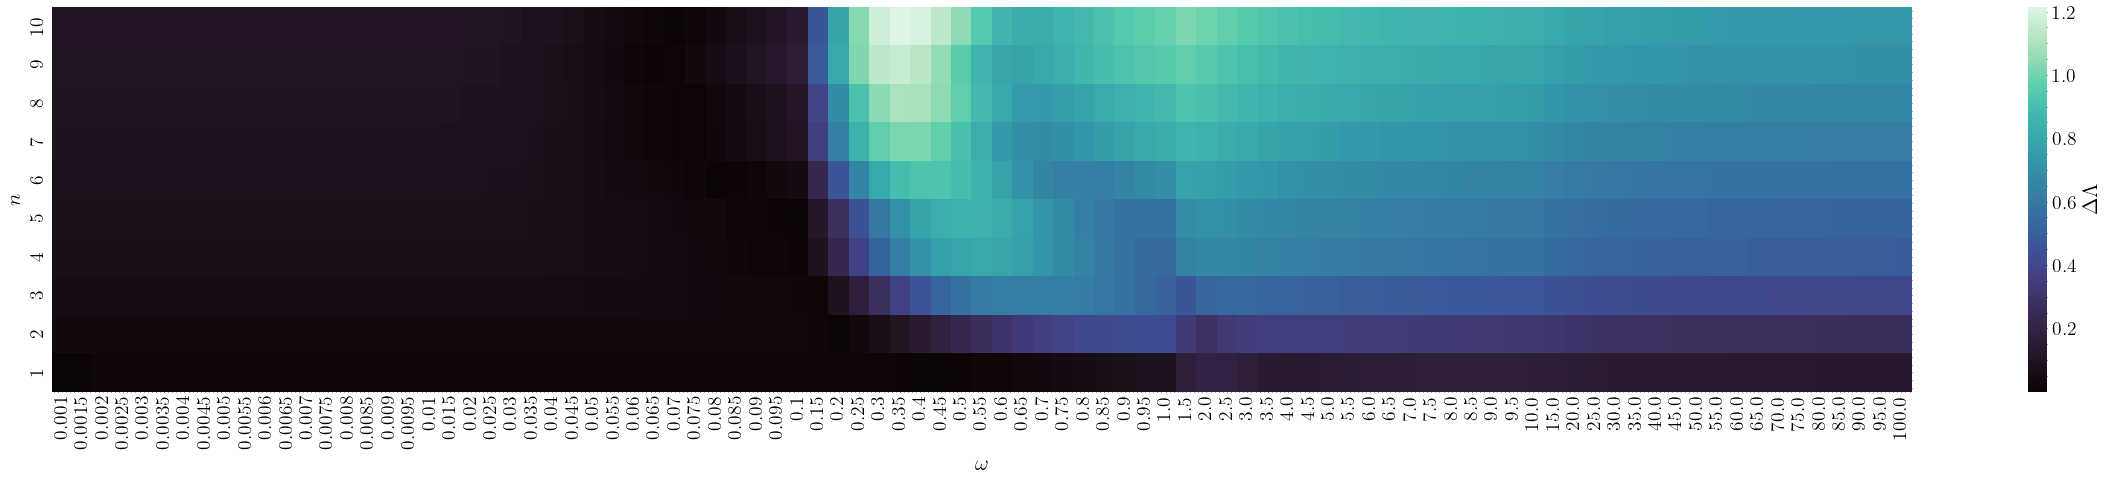

In [39]:
plt.figure(figsize = (30, 5))
ax = sns.heatmap(data = df, cmap = "mako", cbar_kws = {"label" : "$\Delta \Lambda$"}, vmax = np.max(datos), vmin = np.min(datos), robust = True, linewidths = 0.0)
ax.set(xlabel="$\omega$",
       ylabel="$n$",)
ax.invert_yaxis()
plt.savefig("graficas/difusividad_espectral_heatmap.png", dpi = 300.0, bbox_inches = "tight")
plt.show()